<a href="https://colab.research.google.com/github/deepanshudaw/Adversarial-Attacks/blob/master/Random_adversaries_MNIST_Keras_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix

#Data

In [0]:
mnist = keras.datasets.mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

#Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0618 10:23:06.229394 140240953980800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2632 - acc: 0.9244
Epoch 2/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1179 - acc: 0.9650
Epoch 3/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0806 - acc: 0.9755
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0611 - acc: 0.9815
Epoch 5/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0456 - acc: 0.9857
Epoch 6/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0365 - acc: 0.9885
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0296 - acc: 0.9912
Epoch 8/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0236 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0190 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 9s 146us/sampl

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0854 - acc: 0.9751
Test accuracy: 0.9751


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#Distorted Image creation


Create a new array with test images

In [0]:
test=np.empty([10000,28,28])
for i in range(10000):
  for j in range(28):
    for k in range(28):
      test[i][j][k]=test_images[i][j][k]
test=test.reshape(10000,784)

The function distort takes a distortion and the index of the new array(the data element to be distorted from 10000 examples) and returns an image which is distorted by that perccentage

In [0]:
def distort(dist,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s=np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,28,28)

A snippet to display what happens to images after they have been distorted

Image Index 591
Distortion :  0


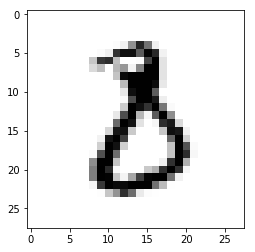

Distortion :  0.1


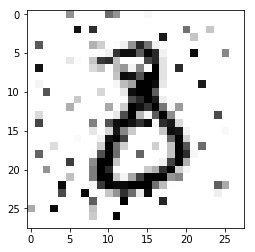

Distortion :  0.2


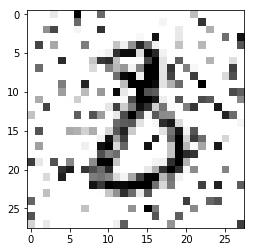

Distortion :  0.3


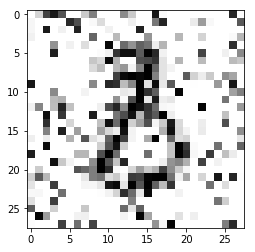

Distortion :  0.4


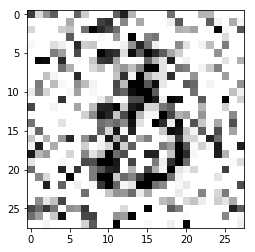

Distortion :  0.5


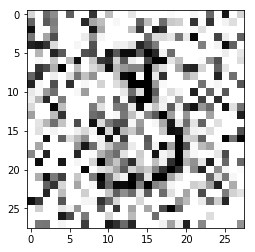

Distortion :  0.6


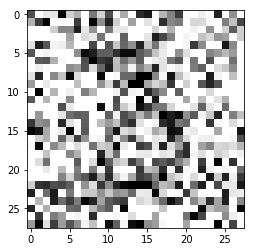

Distortion :  0.7


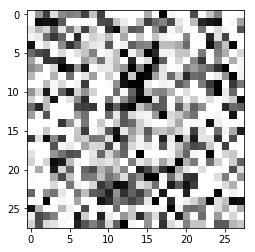

In [0]:
img_index=random.randint(0,9999)
print("Image Index {}".format(img_index))
for distortion in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
  dist_test=np.empty([10000,28,28])
  for i in range(10000):
    dist_test[i]=distort(distortion,i)
  print ('Distortion : ',distortion)
  plt.imshow(dist_test[img_index], cmap='Greys')
  plt.show()

predict function generates an array of 10000 size with predicted label from the datset

In [0]:
def predict():
  predictedarr=np.empty(10000)
  for j in range(10000):
    arr=(model.predict(dist_test[j].reshape(1,28,28))[0])
    for i in range (10):
      if max(arr)==arr[i]:
        predictedarr[j]=i
  return predictedarr

In [0]:
dist_test=np.empty([10000,28,28])
acc=[]
for j,distortion in enumerate(np.arange(10)/10):
  dist_test=np.empty([10000,28,28])
  for i in range(10000):
    dist_test[i]=distort(distortion,i)
  test_loss, test_acc = model.evaluate(dist_test, test_labels)
  acc.insert(j,test_acc)
  print("Distortion: ",distortion,"  |  ","Accuracy:  ",test_acc)
  pred=predict()
  print(confusion_matrix(pred,test_labels))
  print()
  print("_____________________________________________________")

10000/10000 [==============================] - 1s 99us/sample - loss: 0.0854 - acc: 0.9751
Distortion:  0.0   |   Accuracy:   0.9751
[[ 972    0    6    0    1    2    3    1    9    2]
 [   0 1126    4    0    0    1    2    8    0    4]
 [   1    3  991    3    1    0    3    6    3    0]
 [   0    1    3  997    1   18    1    3    8   10]
 [   0    0    1    0  964    2    3    1    4   12]
 [   1    0    0    0    1  856    3    0    8    5]
 [   3    2    5    2    4    5  943    0    3    0]
 [   1    0    8    3    2    1    0 1002    5    2]
 [   2    3   13    5    1    5    0    1  929    3]
 [   0    0    1    0    7    2    0    6    5  971]]

_____________________________________________________
10000/10000 [==============================] - 1s 101us/sample - loss: 0.2376 - acc: 0.9329
Distortion:  0.1   |   Accuracy:   0.9329
[[ 949    0    3    1    0    2    3    1    7    2]
 [   0 1040    2    0    2    1    1    3    0    4]
 [   8   36  991    9   18    1    8   40

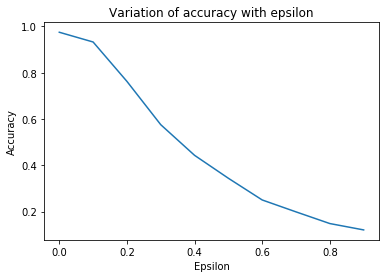

In [0]:
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.title("Variation of accuracy with epsilon")
plt.plot(np.arange(10)/10,acc)
